# Exploring the Relationship Between Unemployment Rate and Federal Funds Rate (2019-2024)

In this notebook, we will pull data directly from the Federal Reserve Economic Data (FRED) API to explore the relationship between the **Unemployment Rate** and the **Federal Funds Rate** in the U.S. economy over the past 5 years (2019-2024). 

We will:
- Fetch unemployment rate data (`UNRATE`) and the effective federal funds rate (`FEDFUNDS`) from FRED.
- Visualize trends in both indicators over time.
- Examine their relationship through basic visual analysis.

---  


In [4]:
# Install required libraries (if not already installed)
#!pip install fredapi
#!pip install yellowbrick

# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred
from dotenv import load_dotenv
import os

# Load environment variables from .env (optional, if you're using an API key from a .env file)
load_dotenv()

# Set your FRED API key (either from environment variables or manually)
#FRED_API_KEY = os.getenv('FRED_API_KEY')  # Ensure your .env file has the API key
# If you don't use a .env file, you can directly set it here:
FRED_API_KEY = 'your_actual_fred_api_key'  # Replace this with your FRED API key - go to https://fredaccount.stlouisfed.org, then sign up for an account and request your API key
# NB: it is a bad idea to post any of your API keys publically, use best practices for storing API Keys in Github repositories instead

fred = Fred(api_key=FRED_API_KEY)


---  

### Fetching Data from FRED

We will use the FRED API to fetch the following data:
- **Unemployment Rate** (`UNRATE`): Monthly unemployment rate in the U.S.
- **Federal Funds Rate** (`FEDFUNDS`): Effective Federal Funds Rate.


In [5]:
# Fetch unemployment rate data (UNRATE) from FRED
unemployment_data = fred.get_series('UNRATE', observation_start='2019-01-01', observation_end='2024-01-01')

# Fetch federal funds rate data (FEDFUNDS) from FRED
fed_funds_data = fred.get_series('FEDFUNDS', observation_start='2019-01-01', observation_end='2024-01-01')

# Convert both series into DataFrames
unemployment_data = pd.DataFrame(unemployment_data, columns=['Unemployment Rate'])
fed_funds_data = pd.DataFrame(fed_funds_data, columns=['Federal Funds Rate'])

# Ensure the indexes are in datetime format
unemployment_data.index = pd.to_datetime(unemployment_data.index)
fed_funds_data.index = pd.to_datetime(fed_funds_data.index)

# Display the first few rows of each DataFrame
unemployment_data.head(), fed_funds_data.head()


(            Unemployment Rate
 2019-01-01                4.0
 2019-02-01                3.8
 2019-03-01                3.8
 2019-04-01                3.7
 2019-05-01                3.6,
             Federal Funds Rate
 2019-01-01                2.40
 2019-02-01                2.40
 2019-03-01                2.41
 2019-04-01                2.42
 2019-05-01                2.39)

--- 
### Merging and Visualizing Data

Now that we've pulled both datasets, let's merge them based on their date indexes and visualize the trends in the unemployment rate and federal funds rate over the past 5 years.


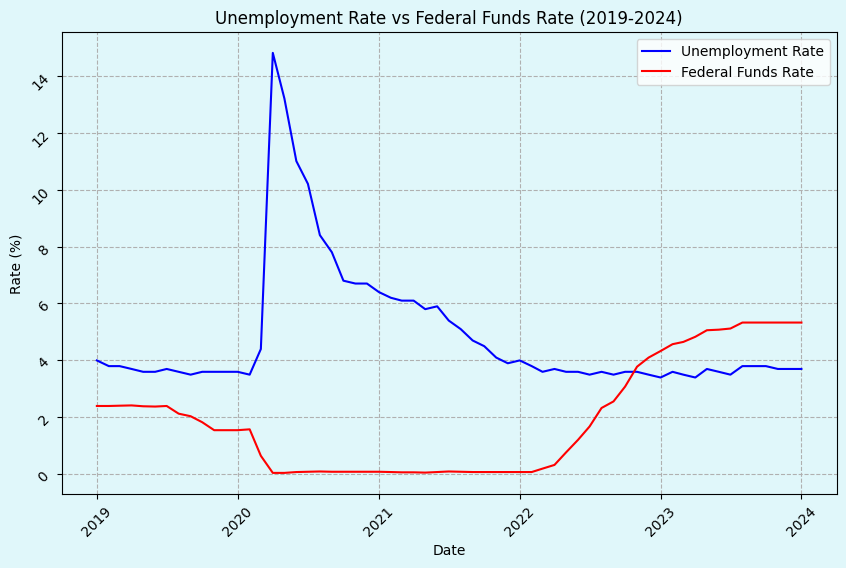

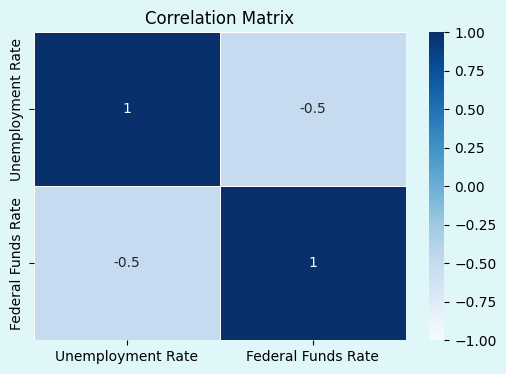

In [11]:
# Merge the unemployment rate and federal funds rate based on their indexes
merged_data = pd.merge(unemployment_data, fed_funds_data, left_index=True, right_index=True)

# Define a very light blue color
very_light_blue = '#e0f7fa'

# Create the plot with a light blue background for the figure
fig, ax = plt.subplots(figsize=(10, 6), facecolor=very_light_blue)

# Set the background color for the plot (axes area)
ax.set_facecolor(very_light_blue)

# Plot unemployment rate and federal funds rate
ax.plot(merged_data.index, merged_data['Unemployment Rate'], label='Unemployment Rate', color='blue')
ax.plot(merged_data.index, merged_data['Federal Funds Rate'], label='Federal Funds Rate', color='red')

# Customize the plot
ax.set_title('Unemployment Rate vs Federal Funds Rate (2019-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Rate (%)')

# Rotate x-axis and y-axis labels by 45 degrees
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=45)

# Add dashed gridlines
ax.grid(True, linestyle='--')

# Add legend
ax.legend()

# Display the plot
plt.show()

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(6, 4), facecolor=very_light_blue)
ax2 = sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, linewidths=0.5)
ax2.set_title('Correlation Matrix')
plt.show()


--- 

### Basic Correlation Analysis

Let's calculate the correlation between the unemployment rate and the federal funds rate to understand the strength of their relationship.


In [9]:
# Calculate and display the correlation between Unemployment Rate and Federal Funds Rate
correlation = merged_data.corr()
print("Correlation between Unemployment Rate and Federal Funds Rate:")
print(correlation)

Correlation between Unemployment Rate and Federal Funds Rate:
                    Unemployment Rate  Federal Funds Rate
Unemployment Rate            1.000000           -0.495902
Federal Funds Rate          -0.495902            1.000000


### Interpretation of the Correlation Between Unemployment Rate and Federal Funds Rate

The correlation matrix shows the relationship between the **Unemployment Rate** and the **Federal Funds Rate** over the period from 2019 to 2024:

- **Unemployment Rate and Federal Funds Rate Correlation: -0.495902**:
    - This value indicates a **moderate negative correlation** between the two variables.
    - A negative correlation means that, historically, as the Federal Funds Rate increases, the Unemployment Rate tends to decrease, and vice versa.

#### Economic Interpretation:

- **Federal Funds Rate**:
    - The Federal Funds Rate is a key monetary policy tool used by the Federal Reserve to influence economic activity.
    - Higher rates often slow down borrowing and economic activity, while lower rates can stimulate growth.
  
- **Unemployment Rate**:
    - The Unemployment Rate measures the percentage of people actively looking for work but unable to find jobs.
    - Typically, economic slowdowns (often prompted by higher rates) can lead to higher unemployment.

#### Insights:
- The **negative correlation** suggests that when the Federal Reserve raises interest rates (often in times of economic strength), unemployment tends to fall, likely because the economy is doing well.
- Conversely, when the Fed lowers rates (often during recessions), unemployment tends to rise, as lower rates are often a response to economic downturns.
  
This relationship is moderate in strength, indicating that while there is a pattern, other factors also influence these variables. Further analysis, such as examining time lags or running regressions, could deepen our understanding of this relationship.

--- 

### Linear Regression: Exploring the Relationship Between Unemployment Rate and Federal Funds Rate

In this section, we will perform a **linear regression analysis** to quantify the relationship between the **Federal Funds Rate** (independent variable) and the **Unemployment Rate** (dependent variable). We will also use **Yellowbrick** to visualize the regression results with:
- **Residuals Plot**: To observe the differences between predicted and actual values.
- **Prediction Error Plot**: To visualize the accuracy of the model's predictions.

Let’s start by preparing our data for the regression analysis.


In [15]:
# Prepare the data
# Unemployment Rate as the target (y), Federal Funds Rate as the feature (X)
X = merged_data[['Federal Funds Rate']]  # Independent variable
y = merged_data['Unemployment Rate']     # Dependent variable

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48, 1), (13, 1), (48,), (13,))

### Building and Fitting the Linear Regression Model

Next, we will create a linear regression model using the **scikit-learn** library and fit it to the training data. This model will attempt to predict the unemployment rate based on the federal funds rate.


In [16]:
# Import the linear regression model from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values for the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the regression model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 5.4129


### Visualizing the Residuals Plot

Now, we will use **Yellowbrick** to create a residuals plot. This plot shows the difference between the predicted and actual unemployment rates. A well-performing model will have residuals randomly scattered around zero.


C:\Users\blake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


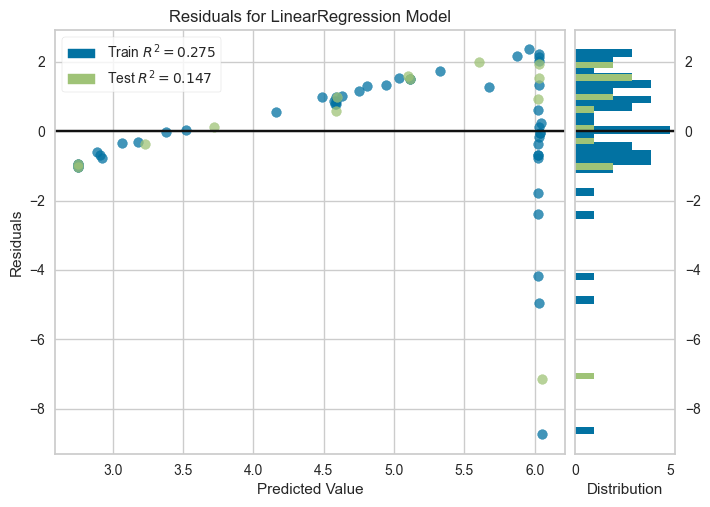

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [18]:
# Import Yellowbrick's ResidualsPlot
from yellowbrick.regressor import ResidualsPlot

# Visualize using Yellowbrick: Residuals Plot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### Visualizing the Prediction Error Plot

Next, we'll use **Yellowbrick** to create a **Prediction Error Plot**, which shows the actual versus predicted values. The closer the points are to the diagonal line, the better the model's predictions.


C:\Users\blake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


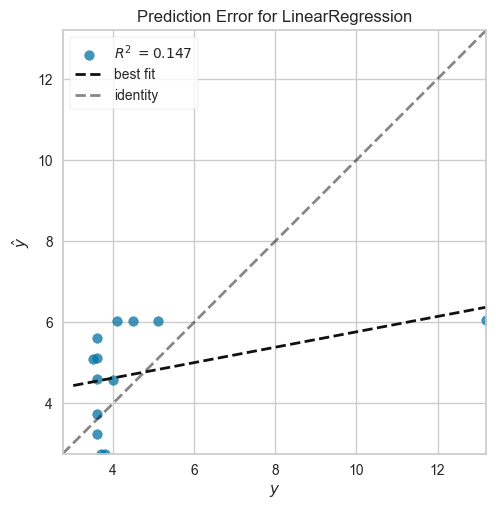

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [19]:
# Import Yellowbrick's PredictionError plot
from yellowbrick.regressor import PredictionError

# Visualize using Yellowbrick: Prediction Error Plot
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()


### Conclusion

From the visualizations and the correlation analysis, we can observe the relationship between the Unemployment Rate and the Federal Funds Rate over the past 5 years. In general:
 - During periods of economic downturn, central banks may lower interest rates to stimulate the economy, which can impact unemployment.   

 - Similarly, rising interest rates may be implemented to curb inflationary pressures, which can also affect employment levels.   

 - *As of September 28, 2024 with the Federal Reserver having lowered rates (50bps!) for the first time in years, the moderate negative correlation between the Federal Funds Rate and the Unemployment Rate reflects the historical tendency for unemployment to decrease when interest rates are raised and increase when interest rates are lowered.*   

 - Through the regression analysis, we performed a linear regression to investigate the relationship between the **Federal Funds Rate** and the **Unemployment Rate**. The Mean Squared Error (MSE) provided a quantitative measure of the model's performance, while the **Residuals Plot** and **Prediction Error Plot** offered visual insights into how well the model fits the data.

- **Residuals Plot**: Ideally, residuals should be randomly distributed around zero. Any clear patterns indicate areas where the model might not be fitting the data well.
- **Prediction Error Plot**: The closer the points are to the diagonal line, the better the model is at predicting the unemployment rate based on the federal funds rate.


 - This relationship is not strong enough to be considered a direct cause-effect relationship, but it provides insight into how these two variables have moved together over time.   
   
Further exploration could involve statistical modeling to predict future trends based on historical data.
